In [28]:
import os
import sys
sys.path.append("/content/face-blurring")

In [29]:
# import the necessary packages
from customlib.face_blurring import anonymize_face_pixelate
from customlib.face_blurring import anonymize_face_simple
import numpy as np
import argparse
import cv2
import os

In [30]:
#load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = "/content/face-blurring/face_detector/deploy.prototxt"
weightsPath = "/content/face-blurring/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...


In [31]:
# load the input image from disk, clone it, and grab the image spatial
# dimensions
image = cv2.imread("/content/face-blurring/examples/chris_evans.png")
orig = image.copy()
(h, w) = image.shape[:2]

In [32]:
# construct a blob from the image
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
	(104.0, 177.0, 123.0))

In [33]:
# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


In [34]:
method = "simple"
# loop over the detections
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# detection
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the confidence is greater
	# than the minimum confidence
	if confidence >0.5:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")

		# extract the face ROI
		face = image[startY:endY, startX:endX]

		# check to see if we are applying the "simple" face blurring
		# method
		if method == "simple":
			face = anonymize_face_simple(face, factor=3.0)

		# otherwise, we must be applying the "pixelated" face
		# anonymization method
		else:
			face = anonymize_face_pixelate(face,
				blocks=args["blocks"])

		# store the blurred face in the output image
		image[startY:endY, startX:endX] = face


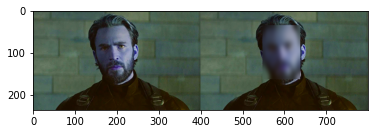

In [35]:
# display the original image and the output image with the blurred
# face(s) side by side
import matplotlib.pyplot as plt
output = np.hstack([orig, image])
plt.imshow(output)